In [1]:
import numpy as np
import pandas as pd
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt

# Load and plot data

In [2]:
df = pd.read_csv("data/data-ss1.txt")
print(len(df))
df.head(5)

21


,X,Y
0,1,11.2
1,2,11.0
2,3,11.3
3,4,10.8
4,5,10.8


Text(0.5, 0, 'Time(day)')

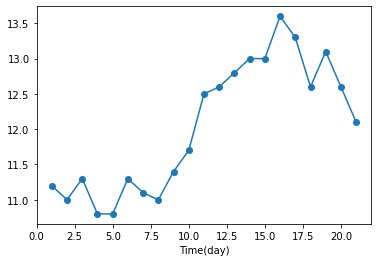

In [3]:
plt.plot(df["X"].values, df["Y"].values, 'o-')
plt.xlabel("Time(day)")

In [4]:
data = {
    "T": len(df),
    "T_pred": 3,
    "Y": df["Y"].values
}

array_dates = np.arange(1, 25, 1)

# Model 12-2

In [5]:
model_12_2 = CmdStanModel(stan_file="model/model12-2.stan")
print(model_12_2)

INFO:cmdstanpy:compiling stan program, exe file: /workdir/chap12/model/model12-2
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /workdir/chap12/model/model12-2


CmdStanModel: name=model12-2
	 stan_file=/workdir/chap12/model/model12-2.stan
	 exe_file=/workdir/chap12/model/model12-2
	 compiler_optons=stanc_options=None, cpp_options=None


In [6]:
fit_12_2 = model_12_2.sample(data=data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4


In [7]:
summary_12_2 = fit_12_2.summary()
summary_12_2[summary_12_2["R_hat"] >= 1.1]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,


In [8]:
np.percentile(fit_12_2.stan_variable("s_mu"), [10.0, 50.0, 90.0])

array([0.2956325, 0.387954 , 0.5079455])

In [9]:
np.percentile(fit_12_2.stan_variable("s_Y"), [10.0, 50.0, 90.0])

array([0.04930578, 0.132613  , 0.2548859 ])

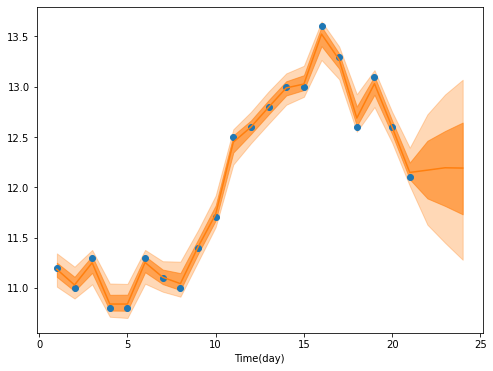

In [10]:
percentils = np.percentile(fit_12_2.stan_variable("mu_all"), [10.0, 25.0, 50.0, 75.0, 90.0] , axis=0)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df["X"].values, df["Y"].values, 'o', color="C0")
ax.fill_between(array_dates, percentils[0], percentils[4], alpha=0.3, color="C1")
ax.fill_between(array_dates, percentils[1], percentils[3], alpha=0.6, color="C1")
ax.plot(array_dates, percentils[2], color="C1")
ax.set_xlabel("Time(day)")
fig.show()

# Model 12-4

In [11]:
model_12_4 = CmdStanModel(stan_file="model/model12-4.stan")
print(model_12_4)

INFO:cmdstanpy:compiling stan program, exe file: /workdir/chap12/model/model12-4
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /workdir/chap12/model/model12-4


CmdStanModel: name=model12-4
	 stan_file=/workdir/chap12/model/model12-4.stan
	 exe_file=/workdir/chap12/model/model12-4
	 compiler_optons=stanc_options=None, cpp_options=None


In [12]:
fit_12_4 = model_12_4.sample(data=data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4


In [13]:
summary_12_4 = fit_12_4.summary()
summary_12_4[summary_12_4["R_hat"] >= 1.1]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,


In [14]:
np.percentile(fit_12_4.stan_variable("s_mu"), [10.0, 50.0, 90.0])

array([0.09973661, 0.16978   , 0.2952773 ])

In [15]:
np.percentile(fit_12_4.stan_variable("s_Y"), [10.0, 50.0, 90.0])

array([0.1887095, 0.2513425, 0.3420747])

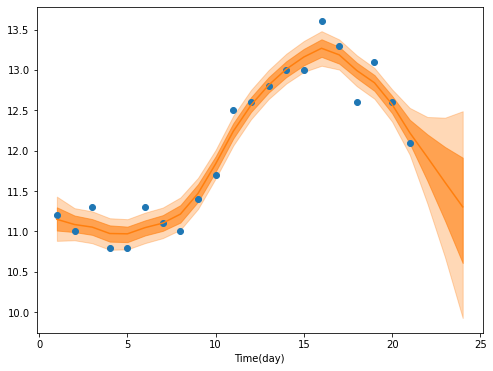

In [16]:
percentils = np.percentile(fit_12_4.stan_variable("mu_all"), [10.0, 25.0, 50.0, 75.0, 90.0] , axis=0)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df["X"].values, df["Y"].values, 'o', color="C0")
ax.fill_between(array_dates, percentils[0], percentils[4], alpha=0.3, color="C1")
ax.fill_between(array_dates, percentils[1], percentils[3], alpha=0.6, color="C1")
ax.plot(array_dates, percentils[2], color="C1")
ax.set_xlabel("Time(day)")
fig.show()